# Trabalho Tópicos II - Classificação com dados do Enem por Escola
### Nomes: Gabriel Estevam de Olivera, Luan Lorenzo dos Santos Borges e Roger Eliodoro Condras

## 1 - Leitura dos Dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv('MICRODADOS_ENEM_ESCOLA.csv', encoding='latin1', sep=';', low_memory=False)

In [3]:
ds.shape

(172305, 27)

In [4]:
ds.head()

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,...,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,...,NaN,NaN,69.03,NaN,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
1,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,...,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
2,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,...,NaN,NaN,64.83,NaN,NaN,NaN,86.5,12.4,1.1,Maior que 90 alunos
3,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,...,72.16,60.02,NaN,NaN,NaN,NaN,90.3,9.7,0.0,Maior que 90 alunos
4,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,...,NaN,NaN,58.84,NaN,NaN,NaN,74.2,21.0,4.8,De 1 a 30 alunos


In [5]:
ds.columns

Index(['NU_ANO', 'CO_UF_ESCOLA', 'SG_UF_ESCOLA', 'CO_MUNICIPIO_ESCOLA',
       'NO_MUNICIPIO_ESCOLA', 'CO_ESCOLA_EDUCACENSO', 'NO_ESCOLA_EDUCACENSO',
       'TP_DEPENDENCIA_ADM_ESCOLA', 'TP_LOCALIZACAO_ESCOLA', 'NU_MATRICULAS',
       'NU_PARTICIPANTES_NEC_ESP', 'NU_PARTICIPANTES', 'NU_TAXA_PARTICIPACAO',
       'NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT',
       'NU_MEDIA_RED', 'NU_MEDIA_OBJ', 'NU_MEDIA_TOT', 'INSE',
       'PC_FORMACAO_DOCENTE', 'NU_TAXA_PERMANENCIA', 'NU_TAXA_APROVACAO',
       'NU_TAXA_REPROVACAO', 'NU_TAXA_ABANDONO', 'PORTE_ESCOLA'],
      dtype='object')

## 2 - Limpeza e transformações

In [6]:
ds = ds[ds['NU_ANO'] >= 2009]

In [7]:
ds.drop(['CO_UF_ESCOLA', 'CO_MUNICIPIO_ESCOLA', 'CO_ESCOLA_EDUCACENSO', 
         'NU_PARTICIPANTES_NEC_ESP', 'NU_MEDIA_OBJ', 'NU_MEDIA_TOT', 
         'NU_TAXA_PERMANENCIA', 'NU_TAXA_REPROVACAO', 'NU_TAXA_ABANDONO'],
        axis=1, inplace=True)

In [8]:
ds['NU_MEDIA_RED'].fillna(0, inplace=True)

In [9]:
ds['MEDIA_TOT'] = (ds['NU_MEDIA_CN'] + ds['NU_MEDIA_CH'] 
                   + ds['NU_MEDIA_LP'] + ds['NU_MEDIA_MT'] 
                   + ds['NU_MEDIA_RED'])/5

In [10]:
ds.drop(['NO_MUNICIPIO_ESCOLA', 'NO_ESCOLA_EDUCACENSO', 'NU_MATRICULAS', 'NU_TAXA_PARTICIPACAO', 'NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED', 'INSE', 'PC_FORMACAO_DOCENTE', 'NU_TAXA_APROVACAO'], axis=1, inplace=True)
ds.head()

,NU_ANO,SG_UF_ESCOLA,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_PARTICIPANTES,PORTE_ESCOLA,MEDIA_TOT
67618,2014,RO,4,1,136,Maior que 90 alunos,638.436
67619,2015,RO,4,1,130,Maior que 90 alunos,641.634
67620,2009,RO,4,1,144,Maior que 90 alunos,629.104
67621,2011,RO,4,1,158,Maior que 90 alunos,625.290
67622,2012,RO,4,1,252,Maior que 90 alunos,620.516


In [11]:
# Regioes: Norte(1), Nordeste(2), Centro-Oeste(3), Sudeste(4), Sul(5)
dic = {'AM':1,'RR':1,'AP':1,'PA':1,'TO':1,'RO':1,'AC':1,
       'MA':2,'PI':2,'CE':2,'RN':2,'PE':2,'PB':2,'SE':2,'AL':2,'BA':2,
       'MT':3,'MS':3,'GO':3,'DF':3,
       'SP':4,'RJ':4,'ES':4,'MG':4,
       'PR':5,'RS':5,'SC':5
      }
def discretizacao(x):
    return dic[x]
ds['REGIAO'] = ds['SG_UF_ESCOLA'].apply(discretizacao)

In [12]:
dic = {'De 1 a 30 alunos':1, 'De 31 a 60 alunos':2, 
       'De 61 a 90 alunos':3, 'Maior que 90 alunos':4}
def discretizacao(x):
    return dic[x]
ds['PORTE_ESCOLA_DIS'] = ds['PORTE_ESCOLA'].apply(discretizacao)

In [13]:
def discretizacao(x):
    if x < 480:
        return 1
    elif x < 509:
        return 2
    elif x < 556:
        return 3
    else:
        return 4
ds['MEDIA_TOT_DIS'] = ds['MEDIA_TOT'].apply(discretizacao)

In [14]:
classes = [0,0,0,0]
for i in ds['MEDIA_TOT_DIS']:
    classes[i-1] += 1
for i in classes:
    print(i/sum(classes))

0.2494483555742356
0.25155941043300506
0.24917133932579977
0.24982089466695961


In [15]:
ds.drop(['NU_PARTICIPANTES', 'PORTE_ESCOLA'], axis=1, inplace=True)

In [16]:
ds.shape

(104687, 8)

## 3 - Visualização

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
pd.options.mode.chained_assignment = None 

In [18]:
plt.rc('figure', figsize=(10, 5))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

### Análise Nacional

In [19]:
group = ds.groupby(['SG_UF_ESCOLA', 'NU_ANO'])
avr_by_state = group['MEDIA_TOT'].mean()
avr_by_state = avr_by_state.unstack(0)
avr_by_state

SG_UF_ESCOLA,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
NU_ANO,,,,,,,,,,,,,,,,,,,,,
2009,480.678500,486.227964,474.817852,478.612231,494.978629,486.801172,552.383946,506.629243,509.185987,472.177087,...,507.896369,534.995278,488.017840,493.617778,480.376324,530.944108,524.863610,489.527239,527.129628,474.567442
2010,492.447164,500.946970,486.289561,494.426945,500.622560,506.840774,559.018190,514.460801,519.371471,480.076430,...,521.252316,544.445966,499.167035,500.022565,490.060053,536.408188,530.492265,497.407519,536.819670,484.066089
2011,468.246510,518.906667,483.144944,506.474400,541.390814,494.287581,539.243558,490.069702,515.468874,490.307005,...,515.716159,565.325067,517.225618,490.406529,483.147750,523.990643,536.727739,515.114310,548.507279,469.447145
2012,466.290302,511.846071,487.032350,476.295313,539.160680,488.691776,534.364950,495.764494,505.799163,487.705405,...,519.305751,544.975860,500.151959,480.590457,476.548381,518.449834,521.728775,491.926844,548.747122,473.447962
2013,478.607934,506.787684,486.094650,472.392357,523.914303,488.378208,537.117836,499.188873,509.072034,489.183162,...,514.851455,541.218187,500.042933,490.409294,480.626211,519.259605,514.597779,493.825291,543.831063,470.002616
2014,471.311176,500.879726,485.616519,467.906800,518.614829,488.324396,541.256230,503.393111,502.336169,479.288461,...,516.644232,537.561888,499.575319,485.438337,482.740341,518.815460,516.851988,491.900571,543.526506,467.154708
2015,494.796364,505.840427,502.411732,489.044172,524.609955,500.701919,545.524759,515.290341,513.378577,494.681399,...,535.878336,541.043263,511.127534,499.787975,499.064389,525.684358,523.458690,513.984783,544.452604,485.671791


#### Desempenho anual por estado

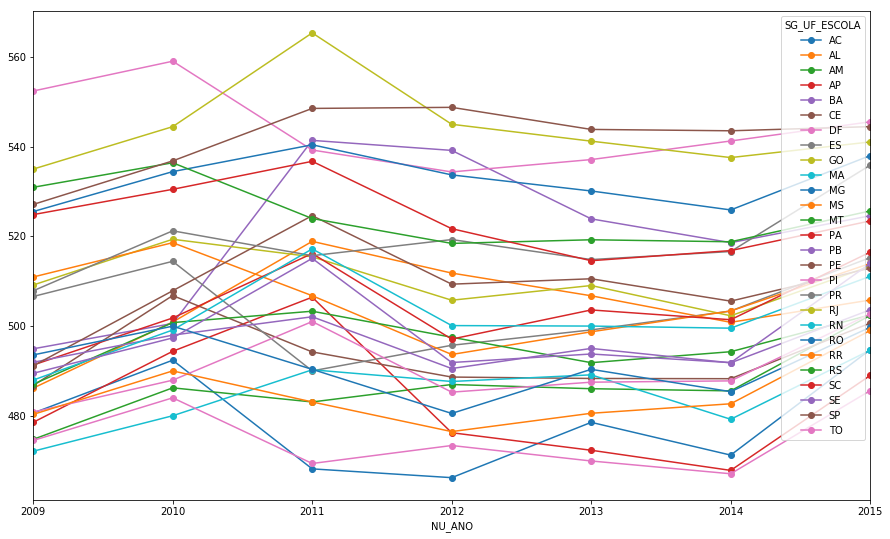

In [20]:
avr_by_state.plot(kind='line', style='o-', figsize=(15, 9))

#### Análise da nota media para todos os estados de 2009 à 2015

In [21]:
avr_by_state['Media nacional no ano'] = avr_by_state.mean(axis=1)

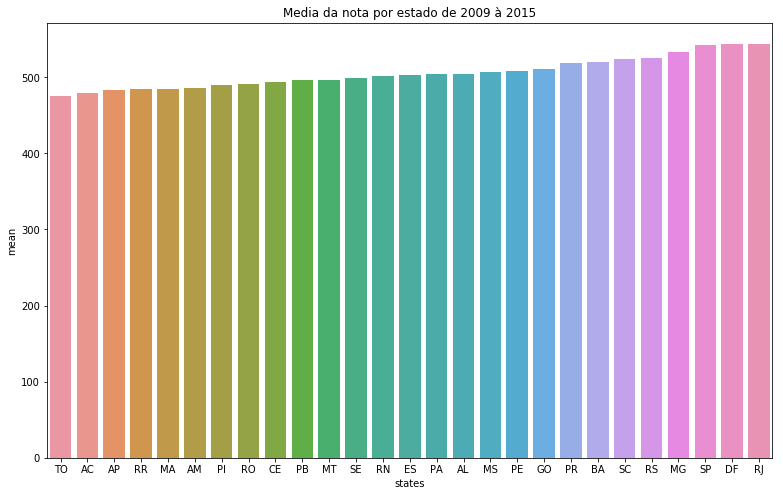

In [22]:
plt.rc('figure', figsize=(13, 8))
r = avr_by_state.drop(columns='Media nacional no ano')
r = pd.DataFrame({
    'mean':r.mean(),
    'states': r.columns
})

r = r.sort_values(['mean']).reset_index(drop=True)

ax = sns.barplot(x="states", y="mean", data=r).set_title("Media da nota por estado de 2009 à 2015")

#### Media de Nacional por ano:

In [23]:
avr_by_state = avr_by_state.rename_axis('Ano').reset_index()

Text(0.5, 1.0, 'Media Nacional por ano')

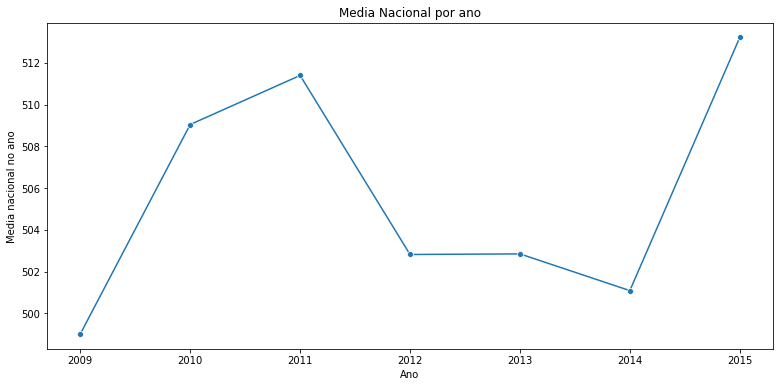

In [24]:
plt.rc('figure', figsize=(13, 6))
sns.lineplot(x="Ano", y="Media nacional no ano", data=avr_by_state, marker="o").set_title("Media Nacional por ano")

#### Comparando os estados com media total mais alta e mais baixa  com a media por ano

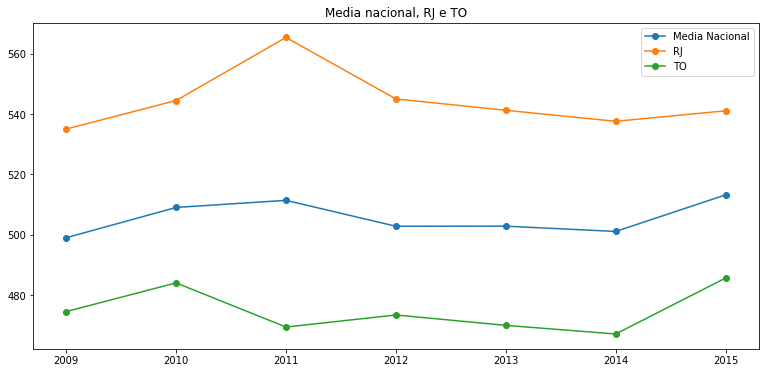

In [25]:
plt.plot(avr_by_state['Ano'], avr_by_state['Media nacional no ano'], label='Media Nacional', marker='o')
plt.plot(avr_by_state['Ano'], avr_by_state['RJ'], label='RJ', marker='o')
plt.plot(avr_by_state['Ano'], avr_by_state['TO'], label='TO', marker='o')
plt.title("Media nacional, RJ e TO")
plt.legend();

### Análise Regional

In [26]:
regiao_sul = ['PR', 'SC', 'RS']
notas_sul = avr_by_state[regiao_sul]
notas_sul['media_sul'] = notas_sul.mean(axis=1)

regiao_sudeste = ['SP', 'MG', 'RJ', 'ES']
notas_sudeste = avr_by_state[regiao_sudeste]
notas_sudeste['media_sudeste'] = notas_sudeste.mean(axis=1)

regiao_nordeste = ['BA', 'SE', 'AL', 'PE', 'PB', 'RN', 'CE', 'PI', 'MA', 'BA']
notas_nordeste = avr_by_state[regiao_nordeste]
notas_nordeste['media_nordeste'] = notas_nordeste.mean(axis=1)

regiao_centro_oeste = ['MS', 'GO', 'MT', 'DF']
notas_centro_oeste = avr_by_state[regiao_centro_oeste]
notas_centro_oeste['media_centro_oeste'] = notas_centro_oeste.mean(axis=1)

regiao_norte = ['AC', 'RO', 'AM', 'RR', 'PA', 'TO', 'AP']
notas_norte = avr_by_state[regiao_norte]
notas_norte['media_norte'] = notas_norte.mean(axis=1)

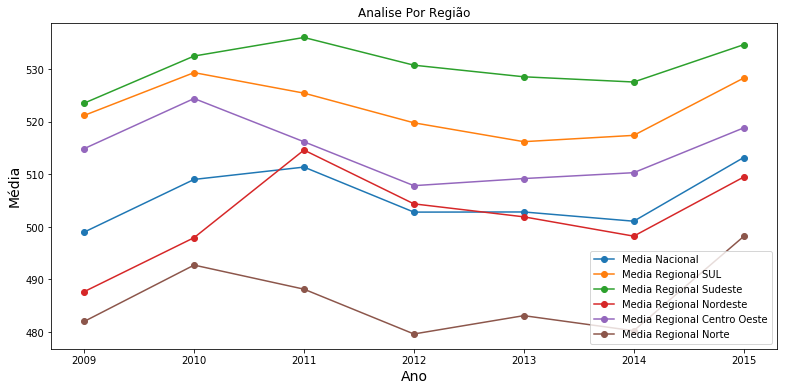

In [27]:
plt.plot(avr_by_state['Ano'], avr_by_state['Media nacional no ano'], label='Media Nacional', marker='o')
plt.plot(avr_by_state['Ano'], notas_sul['media_sul'], label='Media Regional SUL', marker='o')
plt.plot(avr_by_state['Ano'], notas_sudeste['media_sudeste'], label='Media Regional Sudeste', marker='o')
plt.plot(avr_by_state['Ano'], notas_nordeste['media_nordeste'], label='Media Regional Nordeste', marker='o')
plt.plot(avr_by_state['Ano'], notas_centro_oeste['media_centro_oeste'], label='Media Regional Centro Oeste', marker='o')
plt.plot(avr_by_state['Ano'], notas_norte['media_norte'], label='Media Regional Norte', marker='o')
plt.title("Analise Por Região")
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Média', fontsize=14)
plt.legend();

### Análise do Estado de Santa Catarina

#### Análise considerando o tipo de dependência administrativa da escola

In [28]:
ds_sc = ds[ds['SG_UF_ESCOLA'] == 'SC']
ds_sc = ds_sc[['NU_ANO', 'TP_DEPENDENCIA_ADM_ESCOLA', 'MEDIA_TOT']]
tp_adm_names = {1: "Federal", 2: "Estadual", 3: "Municipal", 4: "Privada"}

def naming(x):
    return tp_adm_names[x]

ds_sc['TP_DEPENDENCIA_ADM_ESCOLA'] = ds_sc['TP_DEPENDENCIA_ADM_ESCOLA'].apply(naming)
ds_sc

,NU_ANO,TP_DEPENDENCIA_ADM_ESCOLA,MEDIA_TOT
152019,2009,Estadual,540.210
152020,2010,Estadual,547.422
152021,2012,Estadual,526.548
152022,2013,Estadual,521.722
152023,2014,Estadual,522.206
152024,2015,Estadual,517.770
152025,2010,Estadual,505.372
152026,2009,Estadual,519.414
152027,2010,Estadual,518.388
152028,2014,Estadual,507.792


#### Plotagem de caixa considerando média total e o tipo de dependência administrativa da escola

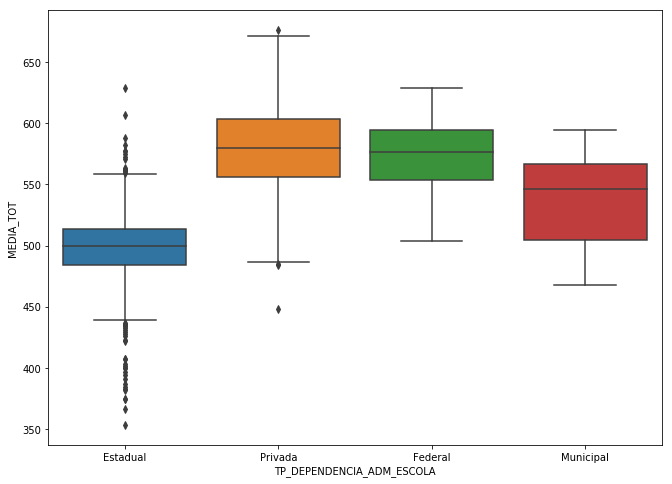

In [29]:
plt.rc('figure', figsize=(11, 8))
ax = sns.boxplot(x="TP_DEPENDENCIA_ADM_ESCOLA", y="MEDIA_TOT", data=ds_sc)

#### Plotagem de enxame considerando média total e o tipo de dependência administrativa da escola

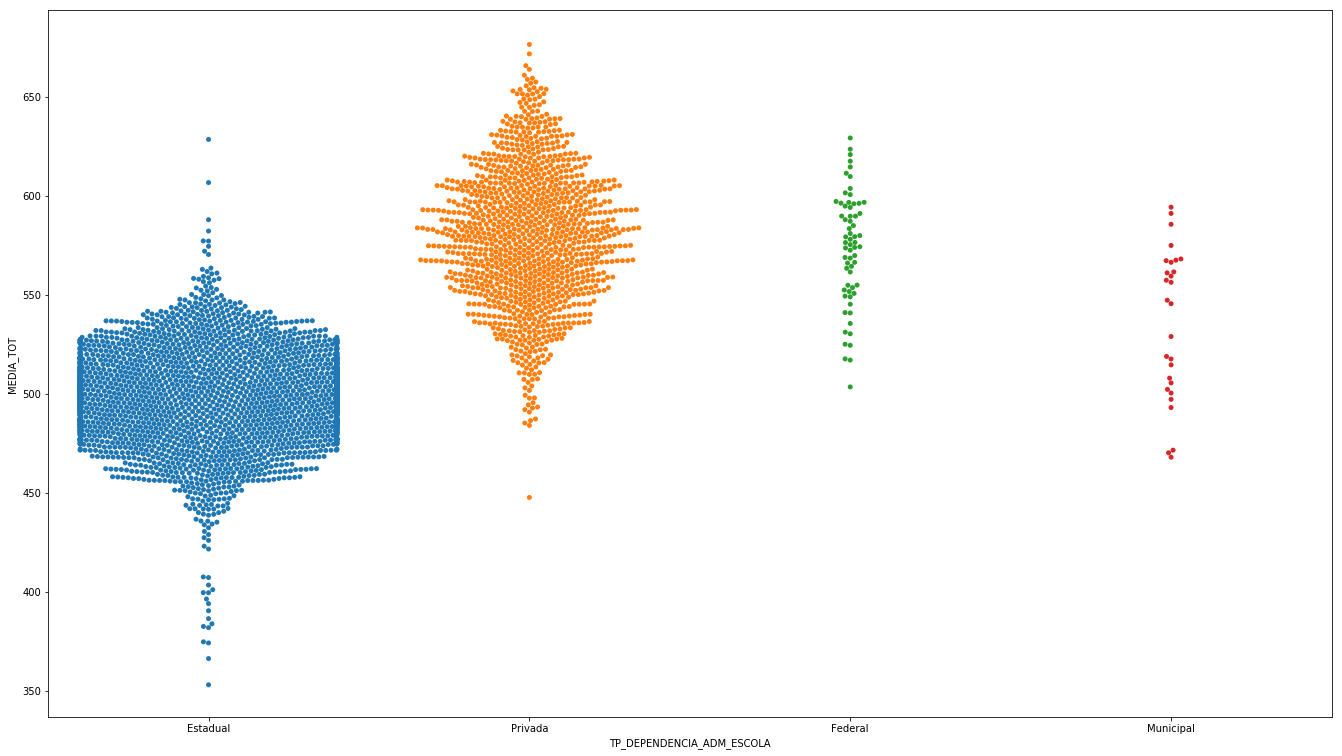

In [30]:
plt.rc('figure', figsize=(23, 13))
ax = sns.swarmplot(x="TP_DEPENDENCIA_ADM_ESCOLA", y="MEDIA_TOT", data=ds_sc)

#### Plotagem de caixa em cada ano considerando a média total de cada escola e seu tipo de dependência administrativa

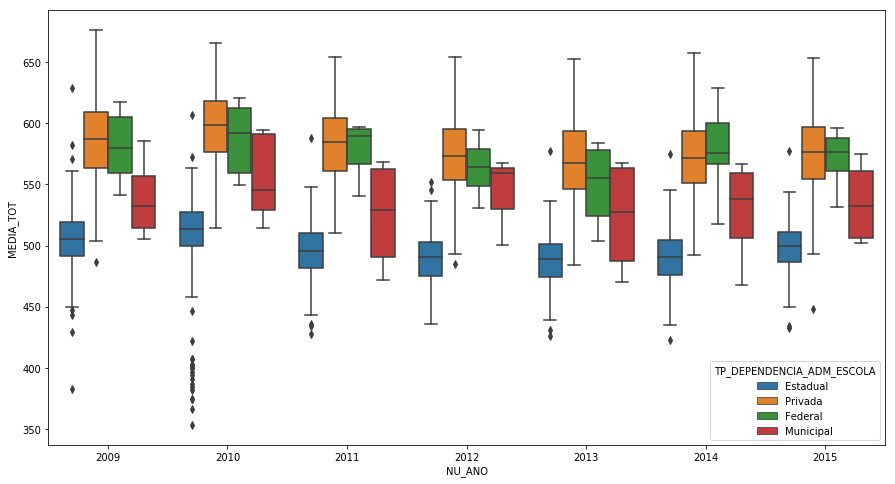

In [31]:
plt.rc('figure', figsize=(15, 8))
ax = sns.boxplot(x="NU_ANO", y="MEDIA_TOT", hue="TP_DEPENDENCIA_ADM_ESCOLA", data=ds_sc)

#### Análise considerando o tipo de localização da escola

In [32]:
ds_sc = ds[ds['SG_UF_ESCOLA'] == 'SC']
ds_sc = ds_sc[['NU_ANO', 'TP_LOCALIZACAO_ESCOLA', 'MEDIA_TOT']]
loc_names = {1: "Urbana", 2: "Rural"}

def naming(x):
    return loc_names[x]

ds_sc['TP_LOCALIZACAO_ESCOLA'] = ds_sc['TP_LOCALIZACAO_ESCOLA'].apply(naming)
ds_sc

,NU_ANO,TP_LOCALIZACAO_ESCOLA,MEDIA_TOT
152019,2009,Urbana,540.210
152020,2010,Urbana,547.422
152021,2012,Urbana,526.548
152022,2013,Urbana,521.722
152023,2014,Urbana,522.206
152024,2015,Urbana,517.770
152025,2010,Urbana,505.372
152026,2009,Urbana,519.414
152027,2010,Urbana,518.388
152028,2014,Urbana,507.792


#### Plotagem de caixa considerando a média total e o tipo de localização da escola em cada ano

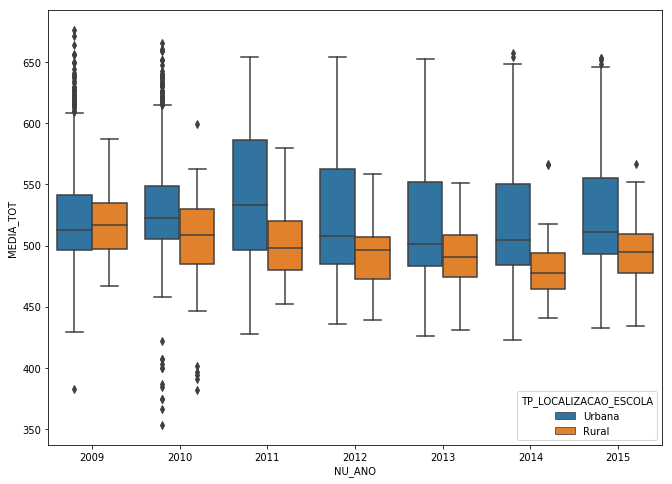

In [33]:
plt.rc('figure', figsize=(11, 8))
ax = sns.boxplot(x="NU_ANO", y="MEDIA_TOT", hue="TP_LOCALIZACAO_ESCOLA", data=ds_sc)

#### Plotagem de caixa considerando a média total e o tipo de localização da escola

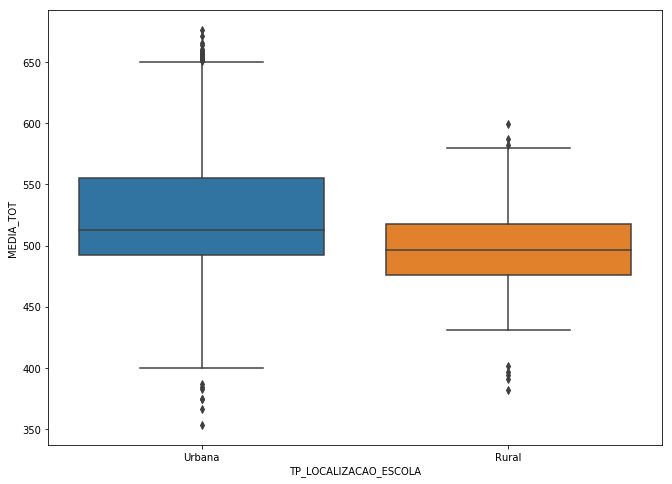

In [34]:
plt.rc('figure', figsize=(11, 8))
ax = sns.boxplot(x="TP_LOCALIZACAO_ESCOLA", y="MEDIA_TOT", data=ds_sc)

## 4 - Classificacao - com classes arbitrárias

### Preparação para classificação

In [35]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [36]:
X = ds[['TP_DEPENDENCIA_ADM_ESCOLA','TP_LOCALIZACAO_ESCOLA','REGIAO','PORTE_ESCOLA_DIS']]
y = ds['MEDIA_TOT_DIS']

In [37]:
# Separa o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) # 70% training and 30% test

In [38]:
feature_cols = ['TP_DEPENDENCIA_ADM_ESCOLA','TP_LOCALIZACAO_ESCOLA','REGIAO','PORTE_ESCOLA_DIS']
classes_target = ['1','2','3','4']

### Árvore de decisão

In [39]:
# Cria o objeto classificador para a árvore de decisão
clf = DecisionTreeClassifier(max_depth=4)

# Traina o objeto classificador
clf = clf.fit(X_train,y_train)

# Realiza a predição a partir do conjunto de teste
y_pred = clf.predict(X_test)

# Apresenta a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5691724774731748


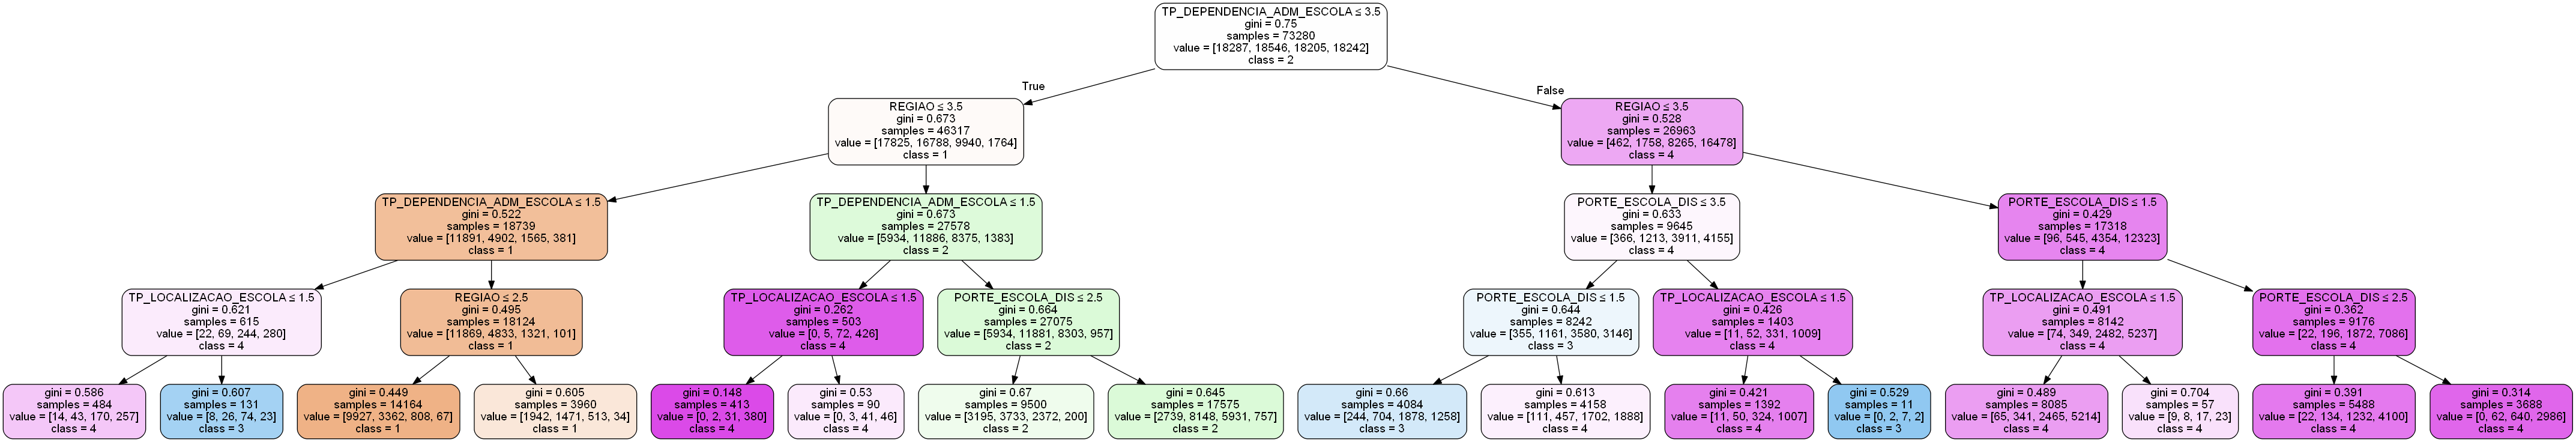

In [40]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=classes_target)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore.png')
Image(graph.create_png())

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Cria o classificador
clfRF=RandomForestClassifier(n_estimators=100)

# Treina o modelo usando os conjuntos de treinamento
clfRF.fit(X_train,y_train)

# Realiza a predição utilizando o conjunto de teste
y_pred=clfRF.predict(X_test)

# Apresenta a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5781513675295317


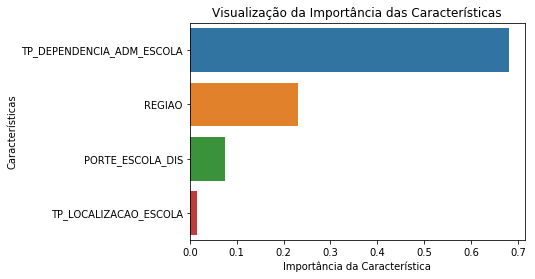

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
feature_imp = pd.Series(clfRF.feature_importances_,index=feature_cols).sort_values(ascending=False)
# Cria um plotagem de barra
sns.barplot(x=feature_imp, y=feature_imp.index)
# Adiciona rótulos para o gráfico
plt.xlabel('Importância da Característica')
plt.ylabel('Características')
plt.title("Visualização da Importância das Características")
plt.show()

### KN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)

# Treina o modelo utilizando o conjunto de treinamento
model.fit(X_train,y_train)

# Prediz a resposta para o conjunto de dados de teste
y_pred = model.predict(X_test)

# Apresenta a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5056834463654599


### Naive Bayes

In [44]:
# Importa o classificador
from sklearn.naive_bayes import GaussianNB

# Cria o classificador
gnb = GaussianNB()

# Treina o modelo usando o conjunto de treinamento
gnb.fit(X_train, y_train)

# Prediz a resposta para o conjunto de teste
y_pred = gnb.predict(X_test)

# Acurária do Modelo; com que frequência o classificador está correto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5479351736873945


## 5 - Clusterização

In [45]:
ds.drop(['NU_ANO', 'SG_UF_ESCOLA'], axis=1, inplace=True)

In [46]:
X = np.array(ds).astype(float)

In [47]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

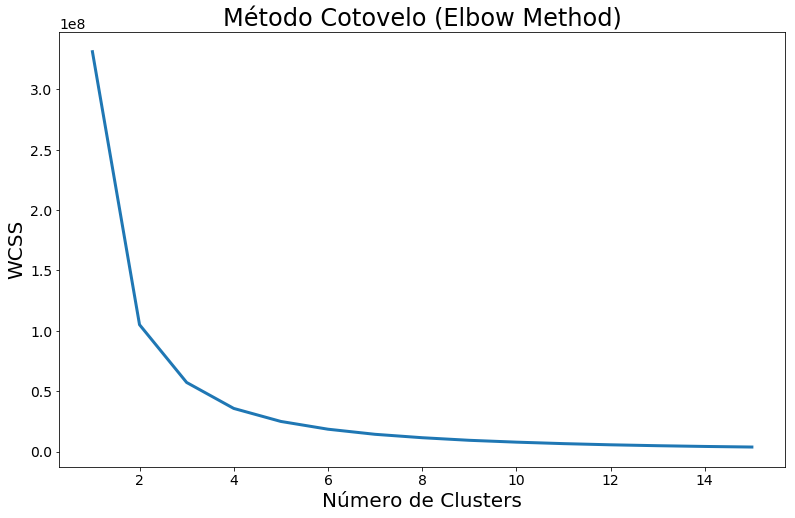

In [48]:
plt.rcParams['figure.figsize'] = (13,8)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize']= 24
plt.rcParams['axes.labelsize']= 20
plt.rcParams['lines.linewidth']= 3
plt.title('Método Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.plot(range(1, 16), wcss)
plt.show()

In [49]:
def numero_otimo_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 15, wcss[len(wcss)-1]

    distancias = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominador = ((y2 - y1)**2 + (x2 - x1)**2)**0.5
        distancias.append(numerador/denominador)
    
    return distancias.index(max(distancias)) + 1

print('Número ótimo de clusters:', numero_otimo_clusters(wcss))

Número ótimo de clusters: 3


In [50]:
# K-means
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
model.fit(X)
print(model.cluster_centers_)

[[  2.8159   1.0269 525.5267   3.6644   2.5941   2.8346]
 [  3.7813   1.007  605.6698   3.709    2.187    4.    ]
 [  2.0889   1.0614 469.3694   3.0224   2.9673   1.3796]]


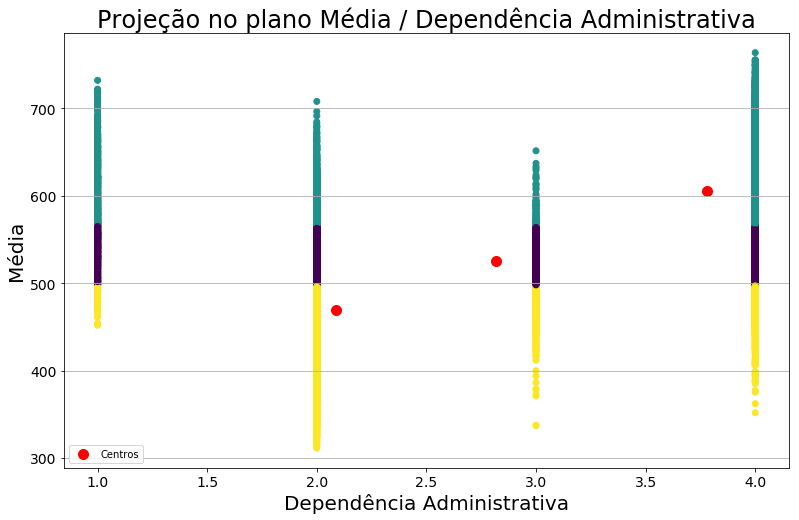

In [51]:
plt.scatter(X[:,0],X[:,2], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,2], s=100, color="red", label="Centros"); # Show the centres
plt.title('Projeção no plano Média / Dependência Administrativa')
plt.xlabel('Dependência Administrativa')
plt.ylabel('Média')
plt.legend(loc='lower left')
plt.grid(True, axis='y')

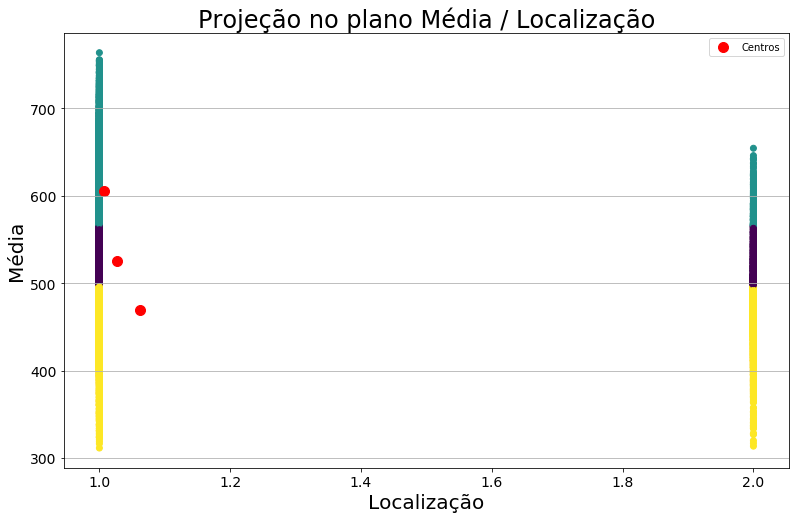

In [52]:
plt.scatter(X[:,1],X[:,2], c=model.labels_);
plt.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,2], s=100, color="red", label="Centros"); # Show the centres
plt.title('Projeção no plano Média / Localização')
plt.xlabel('Localização')
plt.ylabel('Média')
plt.legend(loc='upper right')
plt.grid(True, axis='y')

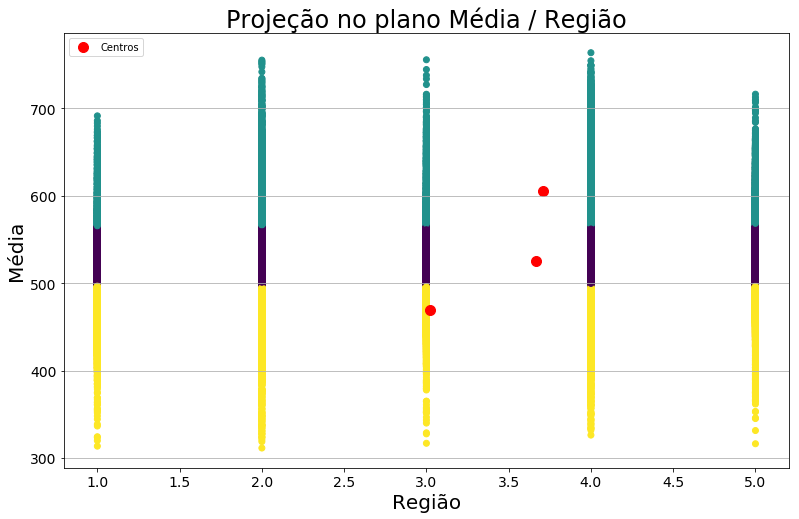

In [53]:
plt.scatter(X[:,3],X[:,2], c=model.labels_);
plt.scatter(model.cluster_centers_[:,3], model.cluster_centers_[:,2], s=100, color="red", label="Centros"); # Show the centres
plt.title('Projeção no plano Média / Região')
plt.xlabel('Região')
plt.ylabel('Média')
plt.legend(loc='upper left')
plt.grid(True, axis='y')

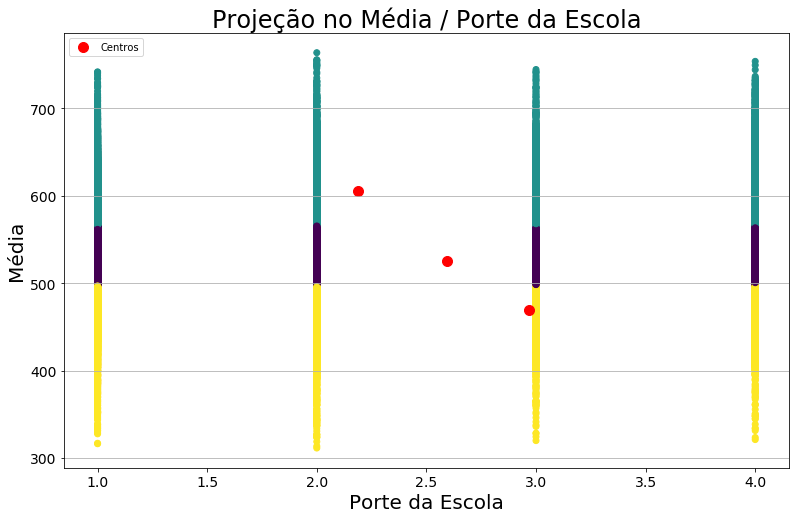

In [54]:
plt.scatter(X[:,4],X[:,2], c=model.labels_);
plt.scatter(model.cluster_centers_[:,4], model.cluster_centers_[:,2], s=100, color="red", label="Centros"); # Show the centres
plt.title('Projeção no Média / Porte da Escola')
plt.xlabel('Porte da Escola')
plt.ylabel('Média')
plt.legend(loc='upper left')
plt.grid(True, axis='y')

In [55]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
ds["clusters"] = kmeans.fit_predict(X)

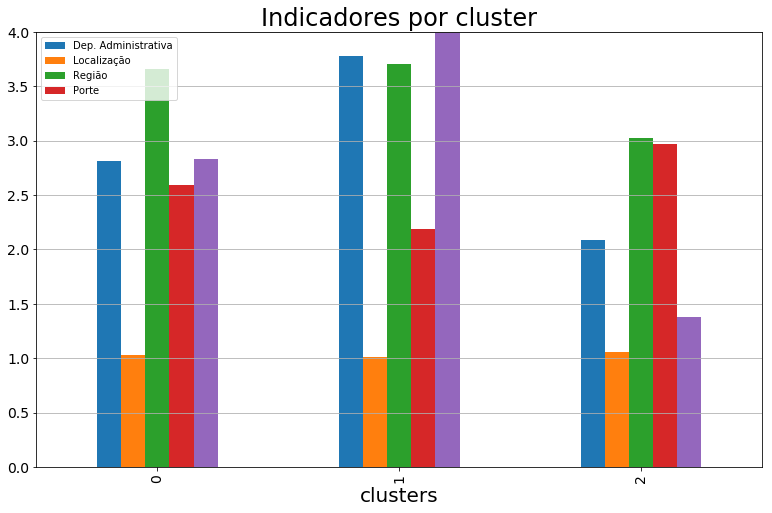

In [56]:
df = ds.drop(['MEDIA_TOT'], axis=1)
df.groupby("clusters").aggregate("mean").plot.bar(figsize=(13,8))
plt.title("Indicadores por cluster")
plt.grid(True, axis='y')
plt.ylim([0,4])
plt.legend(['Dep. Administrativa', 'Localização', 'Região', 'Porte'], loc='upper left')

In [57]:
df.groupby("clusters").aggregate("mean")

,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,REGIAO,PORTE_ESCOLA_DIS,MEDIA_TOT_DIS
clusters,,,,,
0,2.817319,1.026913,3.664615,2.593097,2.836556
1,3.781303,1.007006,3.708925,2.187149,4.000000
2,2.089140,1.061357,3.023086,2.967352,1.380407


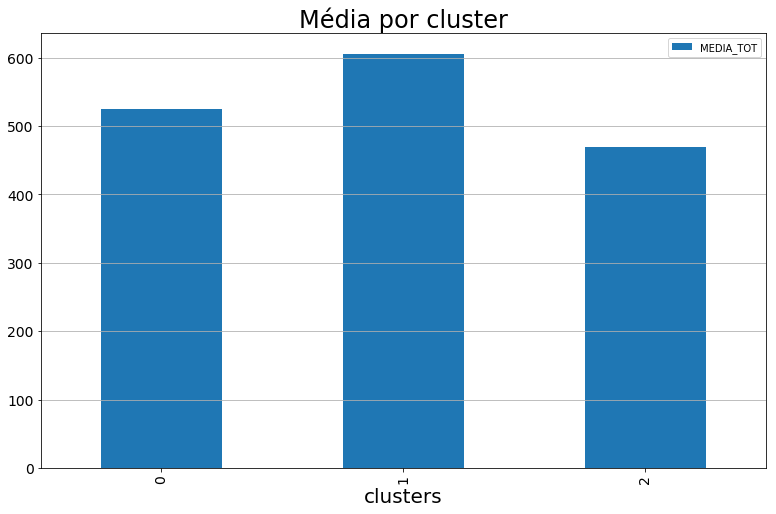

In [58]:
df = ds.drop(['TP_DEPENDENCIA_ADM_ESCOLA', 'TP_LOCALIZACAO_ESCOLA', 'REGIAO', 'PORTE_ESCOLA_DIS', 'MEDIA_TOT_DIS'], axis=1)
df.head()
df.groupby("clusters").aggregate("mean").plot.bar(figsize=(13,8))
plt.title("Média por cluster")
plt.grid(True, axis='y')

In [59]:
df.groupby("clusters").aggregate("mean")

,MEDIA_TOT
clusters,
0,525.594101
1,605.721716
2,469.406030


## 6 - Classificação - com classes encontradas

### Preparação para classificação

In [60]:
def ordenacao(x):
    if x == 0:
        return 2
    elif x == 1:
        return 3
    else:
        return 1
ds['clusters'] = ds['clusters'].apply(ordenacao)

In [61]:
classes = [0,0,0]
for i in ds['clusters']:
    classes[i-1] += 1
for i in classes:
    print(i/sum(classes))

0.4026001318215251
0.38333317412859286
0.21406669404988202


In [62]:
X = ds[['TP_DEPENDENCIA_ADM_ESCOLA', 'TP_LOCALIZACAO_ESCOLA', 'REGIAO', 'PORTE_ESCOLA_DIS']]
y = ds['clusters']

In [63]:
# Separa o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) # 70% training and 30% test

In [64]:
classes_target = ['1','2','3']

### Árvore de decisão

In [65]:
# Cria o objeto classificador para a árvore de decisão
clf = DecisionTreeClassifier(max_depth=4)

# Traina o objeto classificador
clf = clf.fit(X_train,y_train)

# Realiza a predição a partir do conjunto de teste
y_pred = clf.predict(X_test)

# Apresenta a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6569554557901105


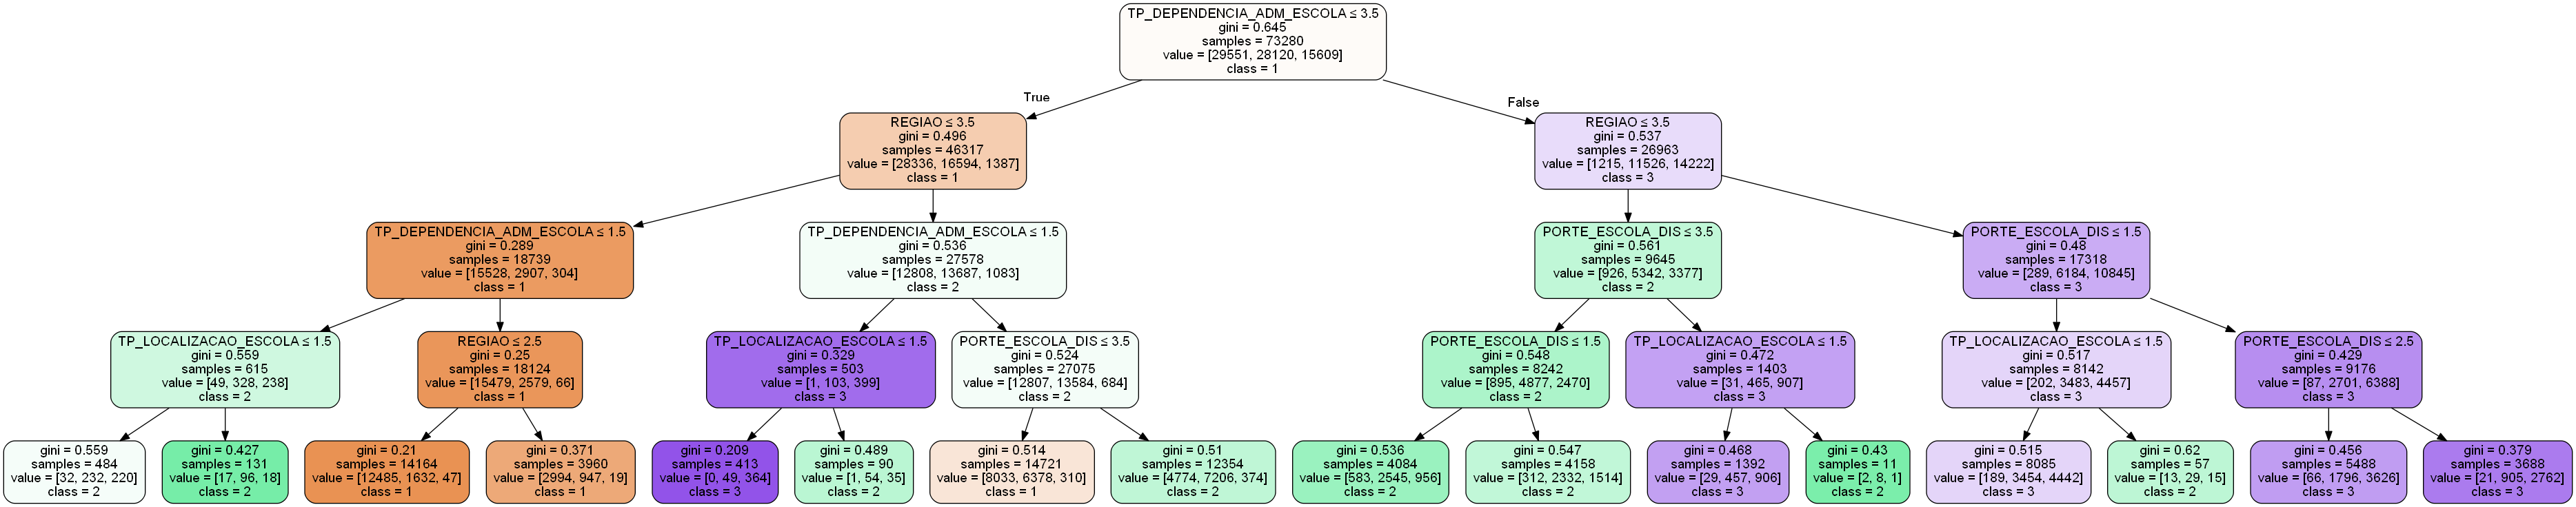

In [66]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=classes_target)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore2.png')
Image(graph.create_png())

### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Cria o classificador
clfRF=RandomForestClassifier(n_estimators=100)

# Treina o modelo usando os conjuntos de treinamento
clfRF.fit(X_train,y_train)

# Realiza a predição utilizando o conjunto de teste
y_pred=clfRF.predict(X_test)

# Apresenta a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6625274620307575


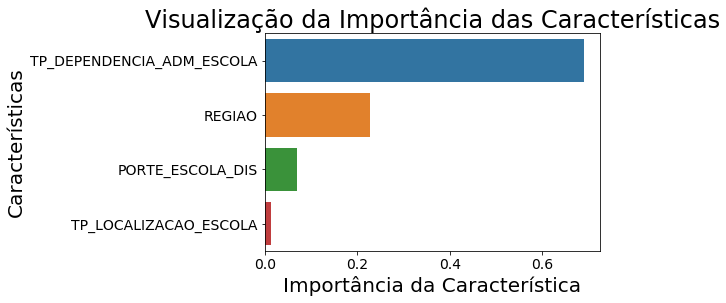

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
feature_imp = pd.Series(clfRF.feature_importances_,index=feature_cols).sort_values(ascending=False)
# Cria um plotagem de barra
sns.barplot(x=feature_imp, y=feature_imp.index)
# Adiciona rótulos para o gráfico
plt.xlabel('Importância da Característica')
plt.ylabel('Características')
plt.title("Visualização da Importância das Características")
plt.show()

### KN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)

# Treina o modelo utilizando o conjunto de treinamento
model.fit(X_train,y_train)

# Prediz a resposta para o conjunto de dados de teste
y_pred = model.predict(X_test)

# Apresenta a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5954086668577069


### Naive Bayes

In [70]:
# Importa o classificador
from sklearn.naive_bayes import GaussianNB

# Cria o classificador
gnb = GaussianNB()

# Treina o modelo usando o conjunto de treinamento
gnb.fit(X_train, y_train)

# Prediz a resposta para o conjunto de teste
y_pred = gnb.predict(X_test)

# Acurária do Modelo; com que frequência o classificador está correto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.577864807208584
